In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-campaign-performance-dataset/ad_campaign_performance.csv


In [67]:
df = pd.read_csv('/kaggle/input/advertising-campaign-performance-dataset/ad_campaign_performance.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [69]:
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


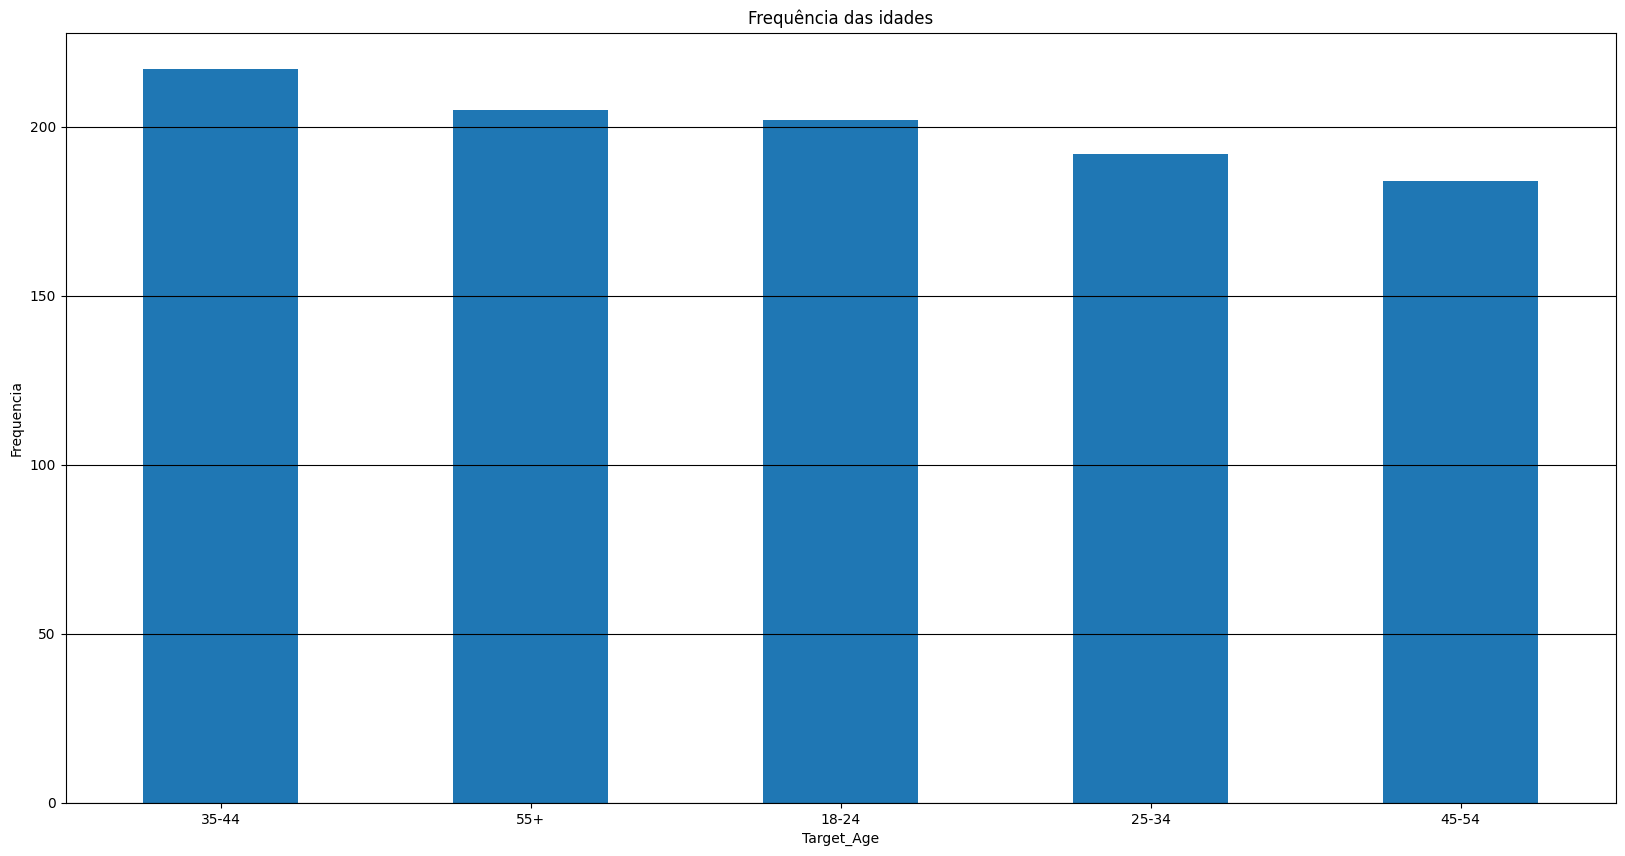

In [70]:
# Frequência das idades alvos

plt.figure(figsize=(20,10))
plt.title("Frequência das idades")
plt.xlabel("Target_Age")
plt.ylabel("Frequencia")
df['Target_Age'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [71]:
qtd_age = df['Target_Age'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Target_Age', 'Frequencia']
qtd_age

,Target_Age,Frequencia
0,35-44,217
1,55+,205
2,18-24,202
3,25-34,192
4,45-54,184


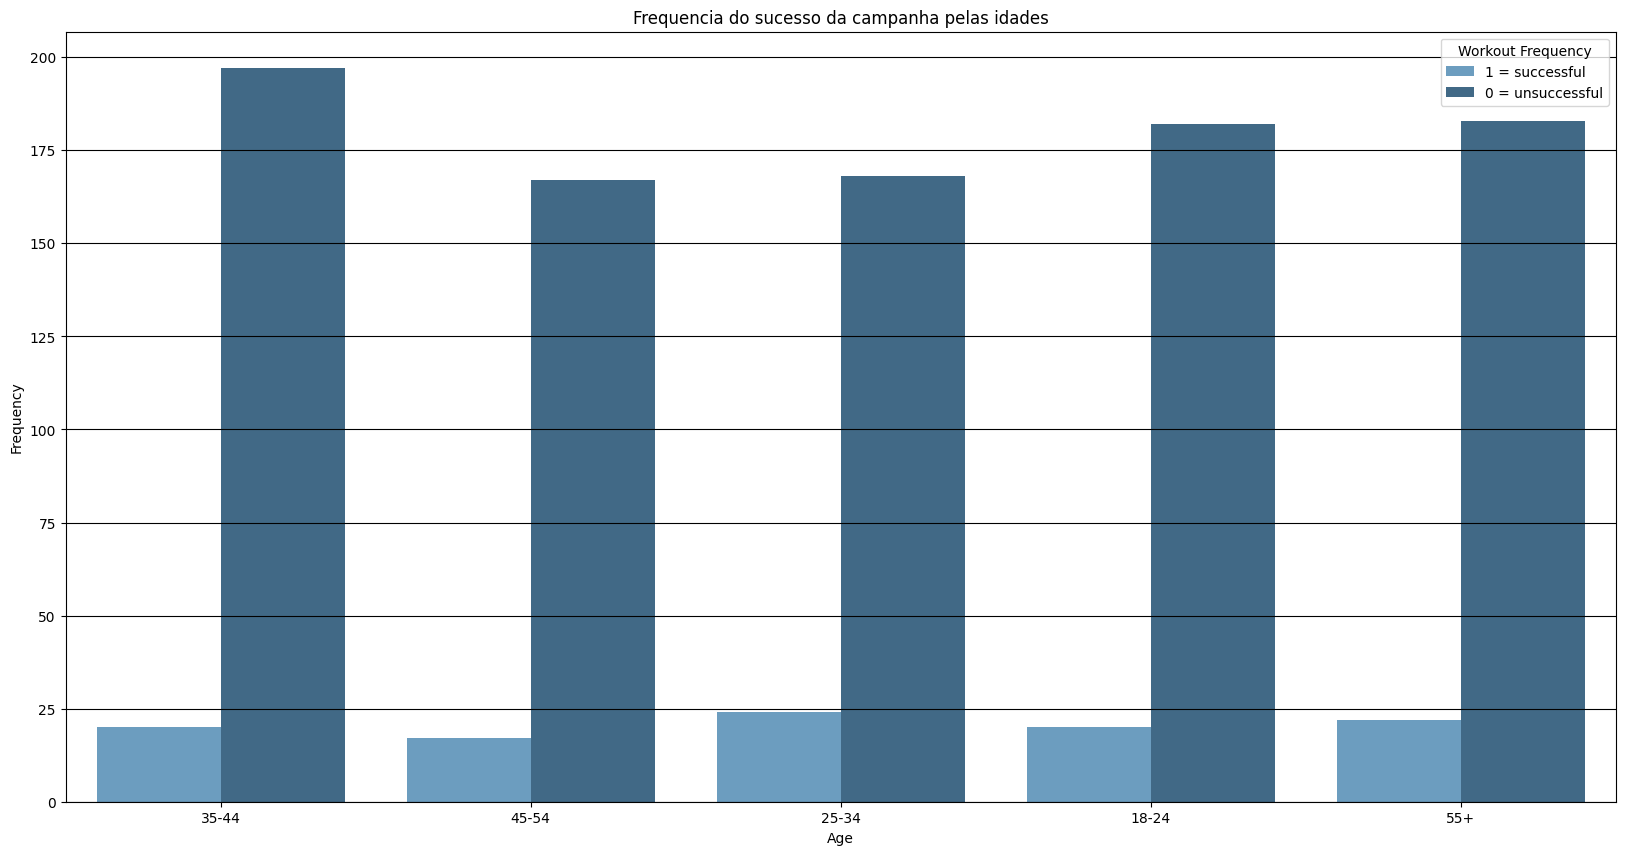

In [72]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Target_Age', hue='Success', data=df, palette='Blues_d')
plt.title('Frequencia do sucesso da campanha pelas idades')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = successful', '0 = unsuccessful']
plt.legend(handles, labels, title="Workout Frequency")
plt.show()

In [73]:
contagem = df.groupby(['Target_Age', 'Success']).size().reset_index(name='Frequency')
contagem

,Target_Age,Success,Frequency
0,18-24,0,20
1,18-24,1,182
2,25-34,0,24
3,25-34,1,168
4,35-44,0,20
5,35-44,1,197
6,45-54,0,17
7,45-54,1,167
8,55+,0,22
9,55+,1,183


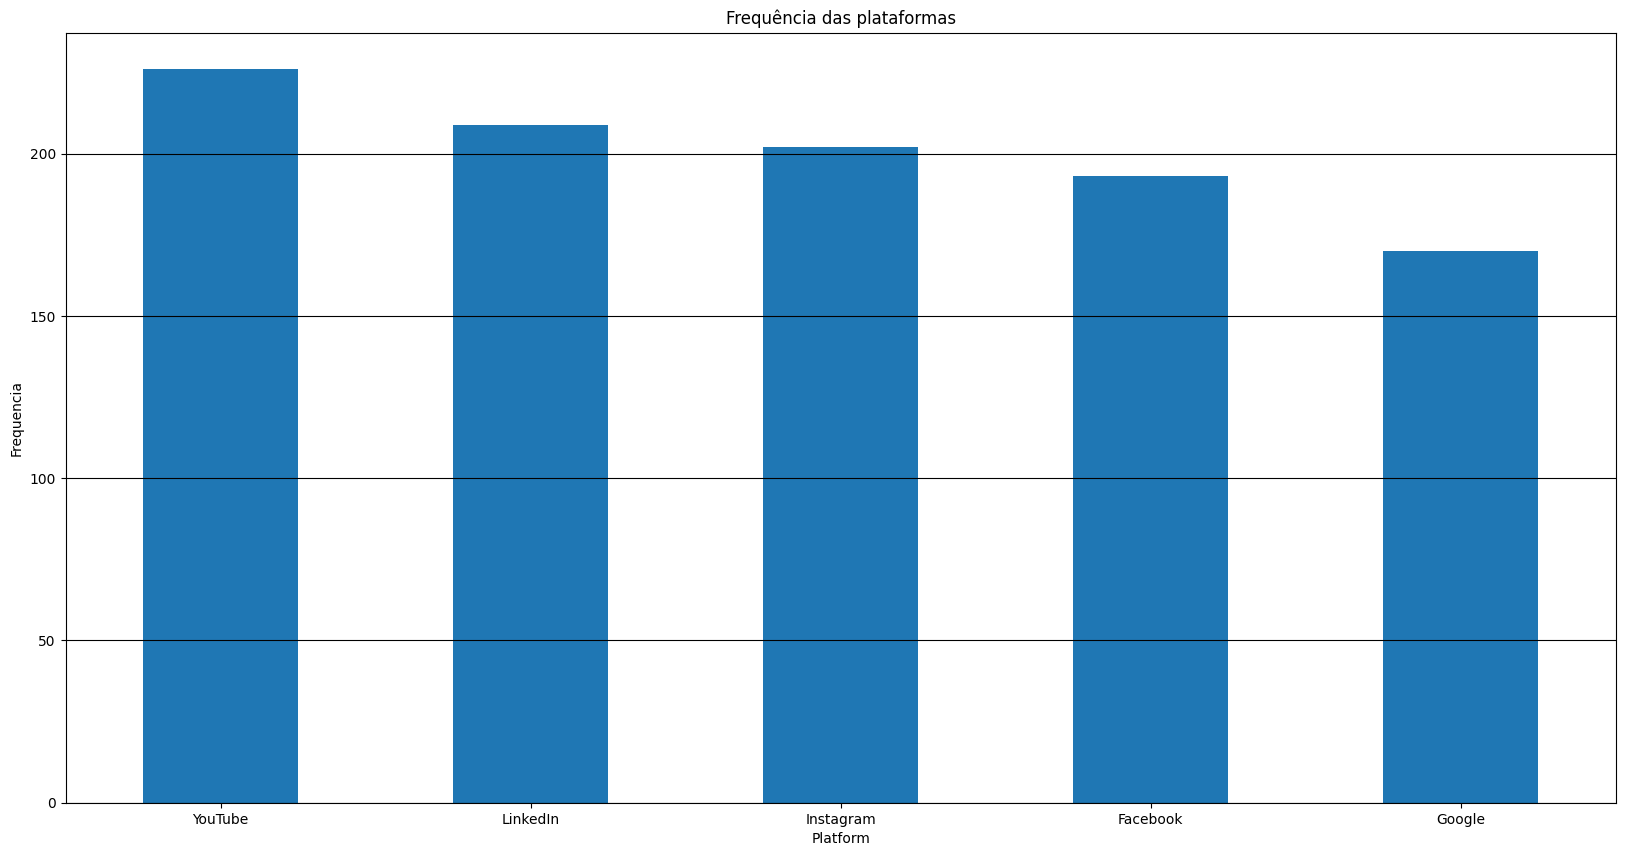

In [74]:
# Platform

plt.figure(figsize=(20,10))
plt.title("Frequência das plataformas")
plt.xlabel("Platform")
plt.ylabel("Frequencia")
df['Platform'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [75]:
qtd = df['Platform'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Platform', 'Frequencia']
qtd

,Platform,Frequencia
0,YouTube,226
1,LinkedIn,209
2,Instagram,202
3,Facebook,193
4,Google,170


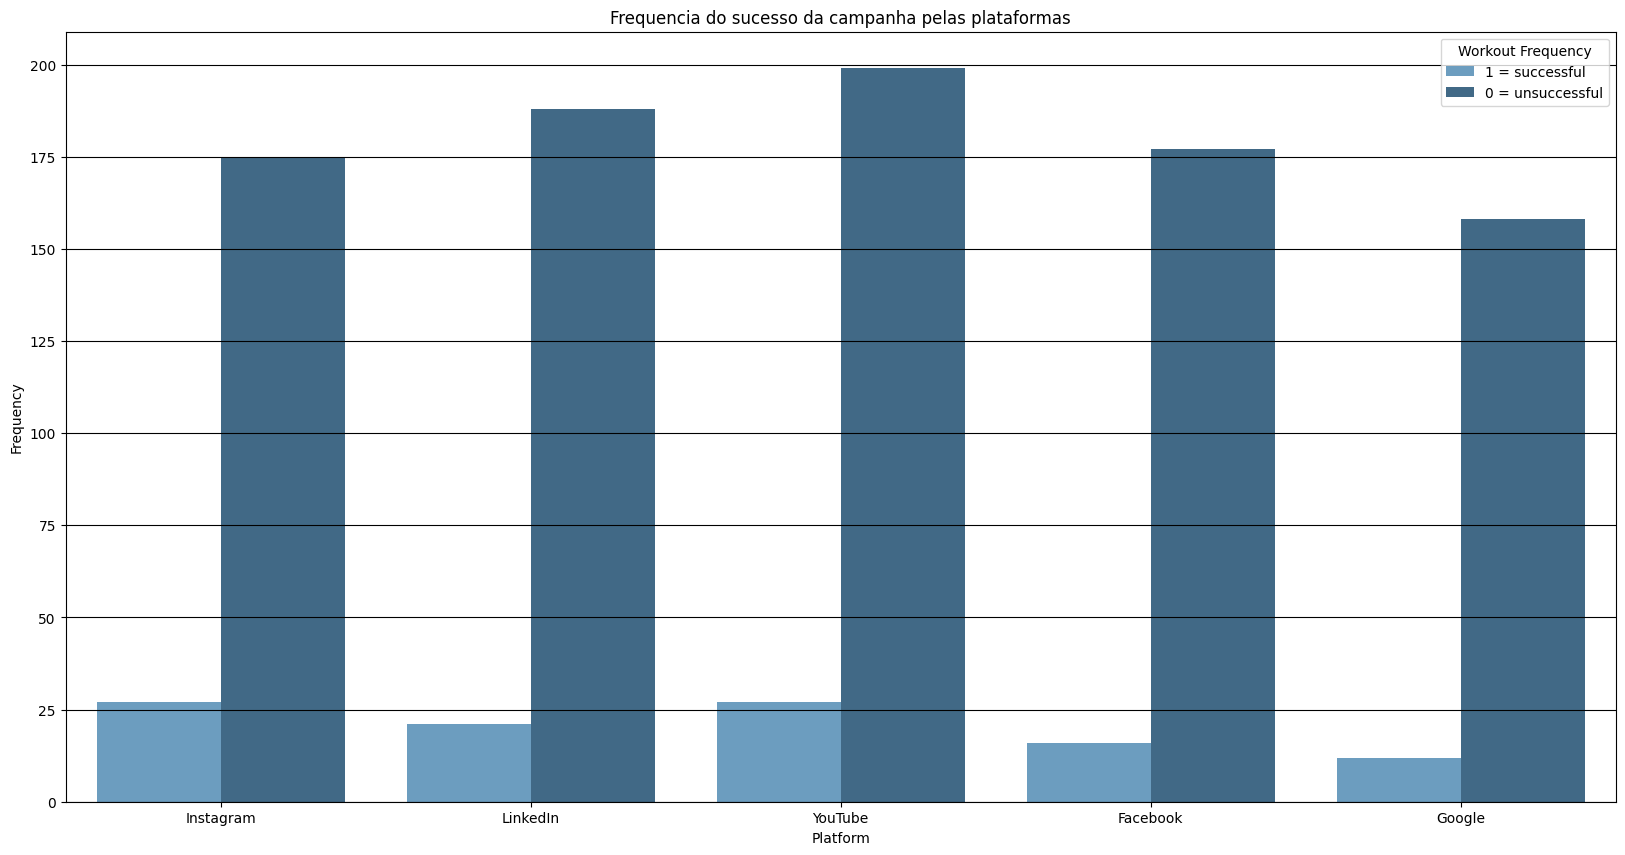

In [76]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Platform', hue='Success', data=df, palette='Blues_d')
plt.title('Frequencia do sucesso da campanha pelas plataformas')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = successful', '0 = unsuccessful']
plt.legend(handles, labels, title="Workout Frequency")
plt.show()

In [77]:
contagem = df.groupby(['Platform', 'Success']).size().reset_index(name='Frequency')
contagem

,Platform,Success,Frequency
0,Facebook,0,16
1,Facebook,1,177
2,Google,0,12
3,Google,1,158
4,Instagram,0,27
5,Instagram,1,175
6,LinkedIn,0,21
7,LinkedIn,1,188
8,YouTube,0,27
9,YouTube,1,199


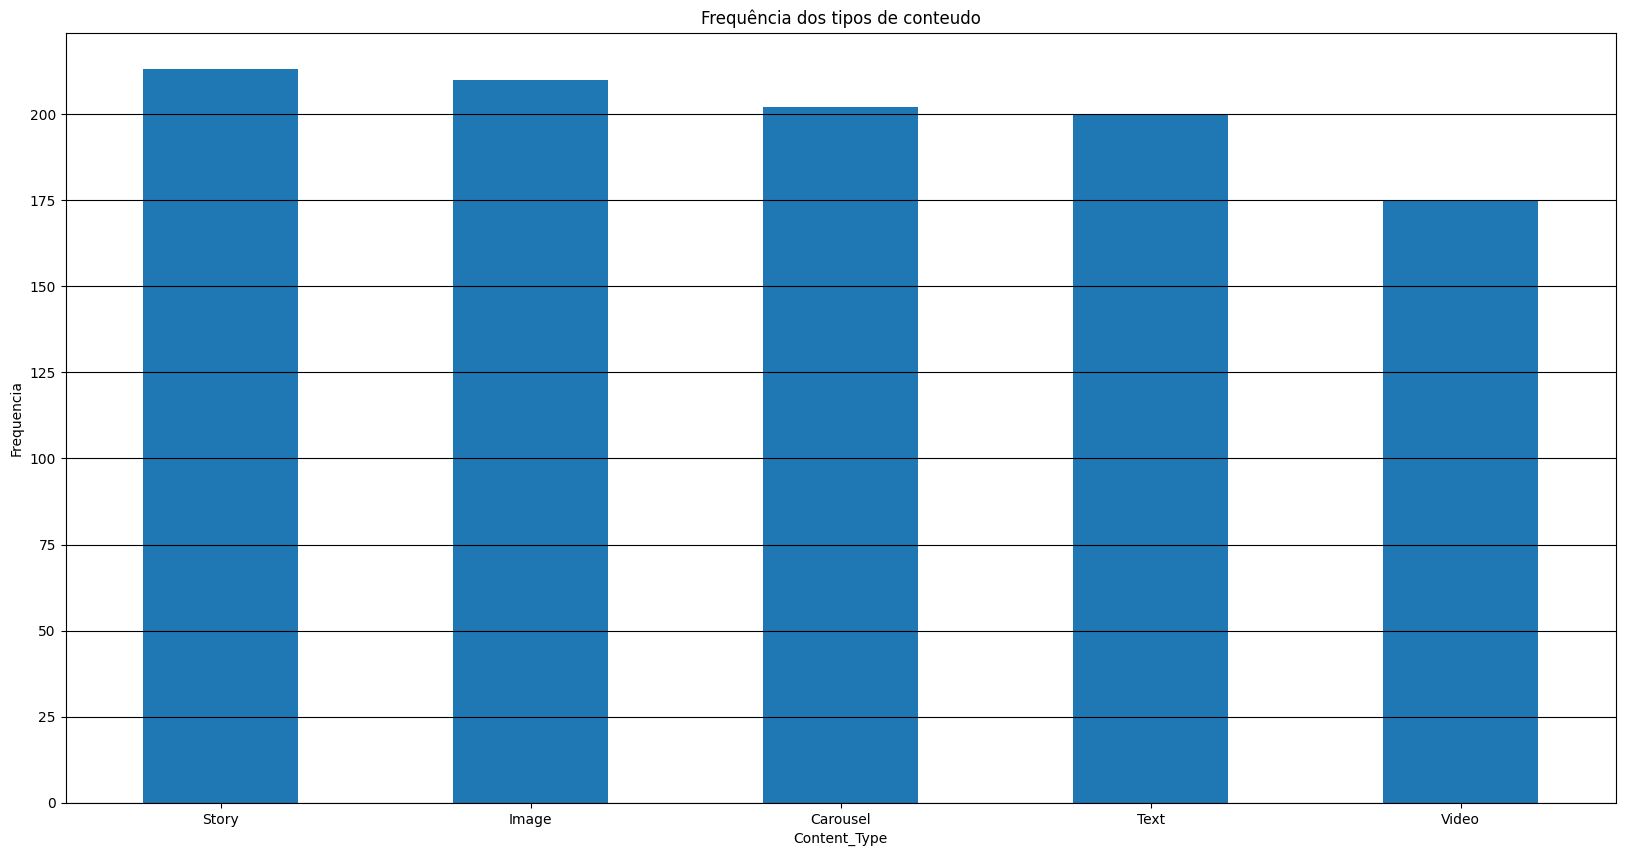

In [78]:
# Content_Type

plt.figure(figsize=(20,10))
plt.title("Frequência dos tipos de conteudo")
plt.xlabel("Content_Type")
plt.ylabel("Frequencia")
df['Content_Type'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [79]:
qtd_age = df['Content_Type'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Content_Type', 'Frequencia']
qtd_age

,Content_Type,Frequencia
0,Story,213
1,Image,210
2,Carousel,202
3,Text,200
4,Video,175


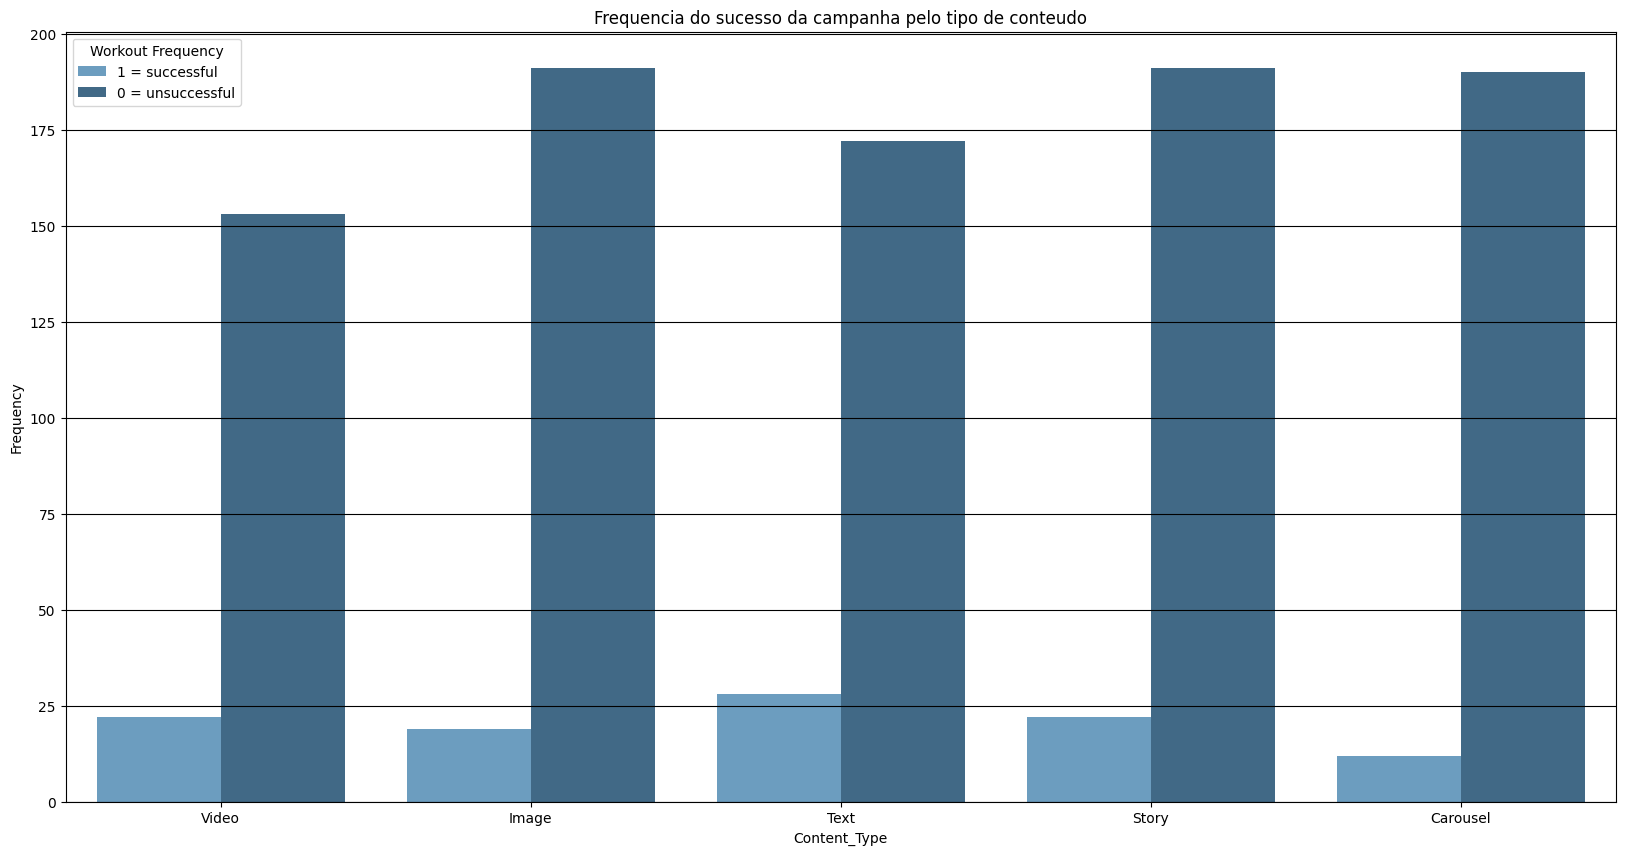

In [99]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Content_Type', hue='Success', data=df, palette='Blues_d')
plt.title('Frequencia do sucesso da campanha pelo tipo de conteudo')
plt.xlabel('Content_Type')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = successful', '0 = unsuccessful']
plt.legend(handles, labels, title="Workout Frequency")
plt.show()

In [100]:
contagem = df.groupby(['Content_Type', 'Success']).size().reset_index(name='Frequency')
contagem

,Content_Type,Success,Frequency
0,Carousel,0,12
1,Carousel,1,190
2,Image,0,19
3,Image,1,191
4,Story,0,22
5,Story,1,191
6,Text,0,28
7,Text,1,172
8,Video,0,22
9,Video,1,153


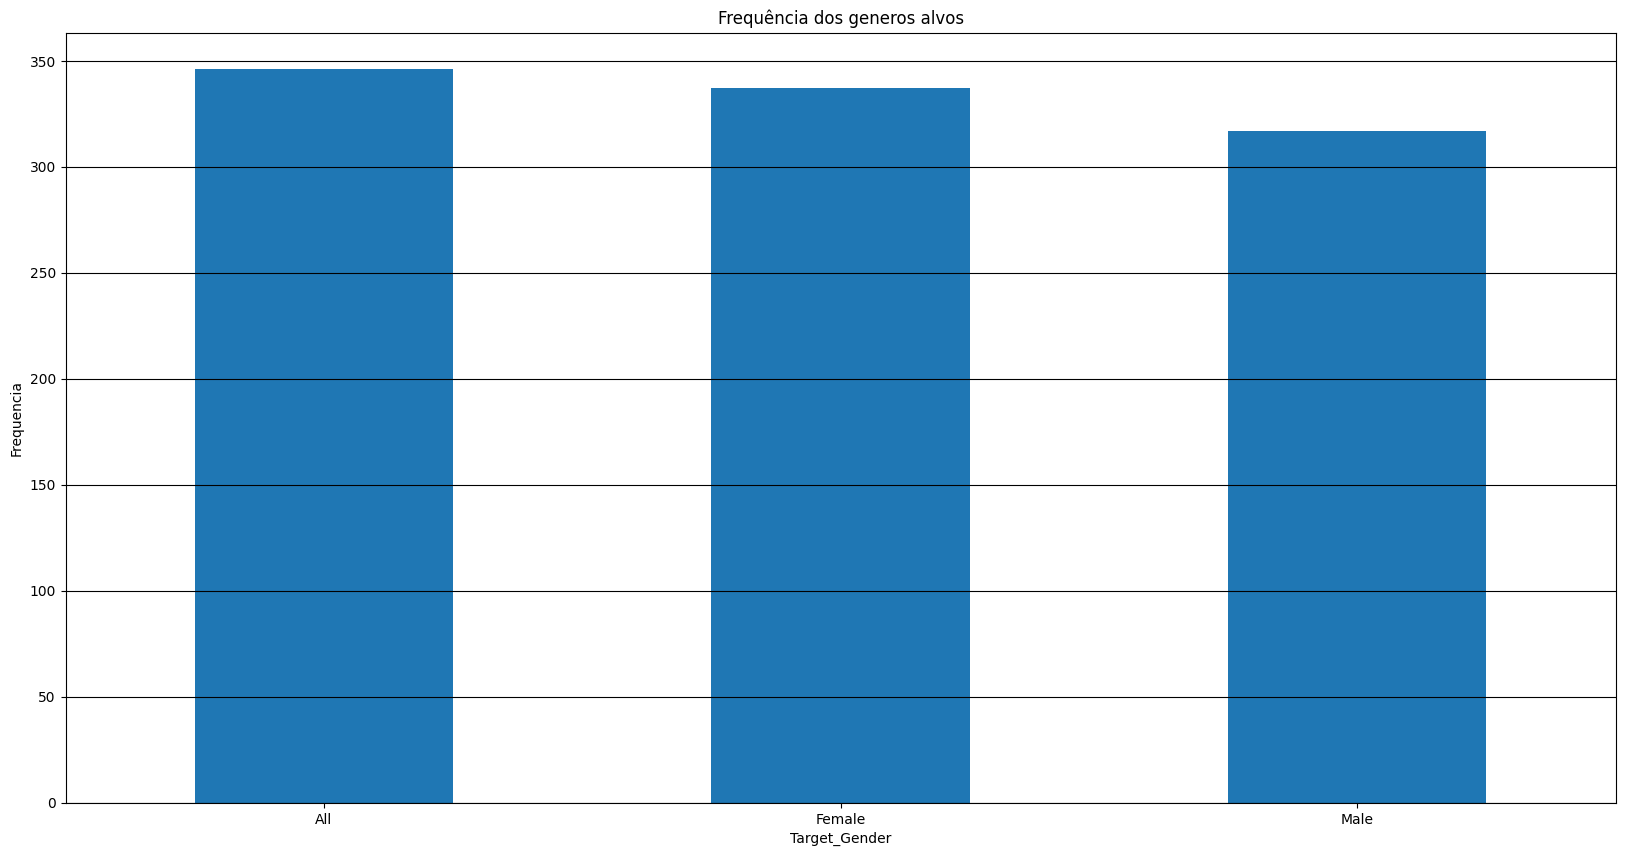

In [82]:
# Target_Gender

plt.figure(figsize=(20,10))
plt.title("Frequência dos generos alvos")
plt.xlabel("Target_Gender")
plt.ylabel("Frequencia")
df['Target_Gender'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [83]:
qtd_age = df['Target_Gender'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Target_Gender', 'Frequencia']
qtd_age

,Target_Gender,Frequencia
0,All,346
1,Female,337
2,Male,317


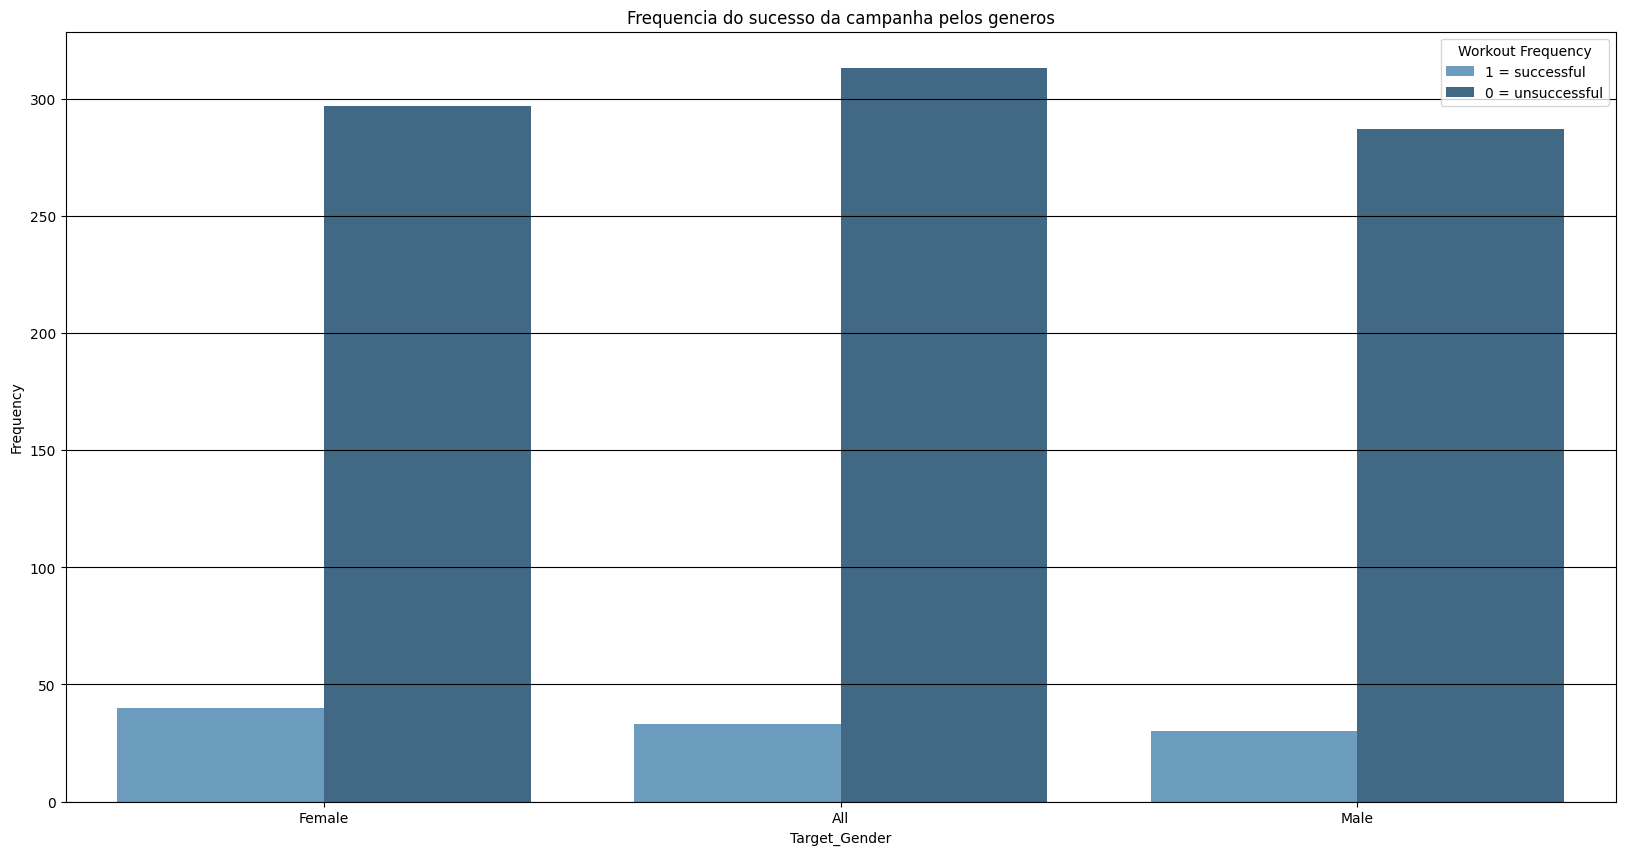

In [84]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Target_Gender', hue='Success', data=df, palette='Blues_d')
plt.title('Frequencia do sucesso da campanha pelos generos')
plt.xlabel('Target_Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = successful', '0 = unsuccessful']
plt.legend(handles, labels, title="Workout Frequency")
plt.show()

In [85]:
contagem = df.groupby(['Target_Gender', 'Success']).size().reset_index(name='Frequency')
contagem

,Target_Gender,Success,Frequency
0,All,0,33
1,All,1,313
2,Female,0,40
3,Female,1,297
4,Male,0,30
5,Male,1,287


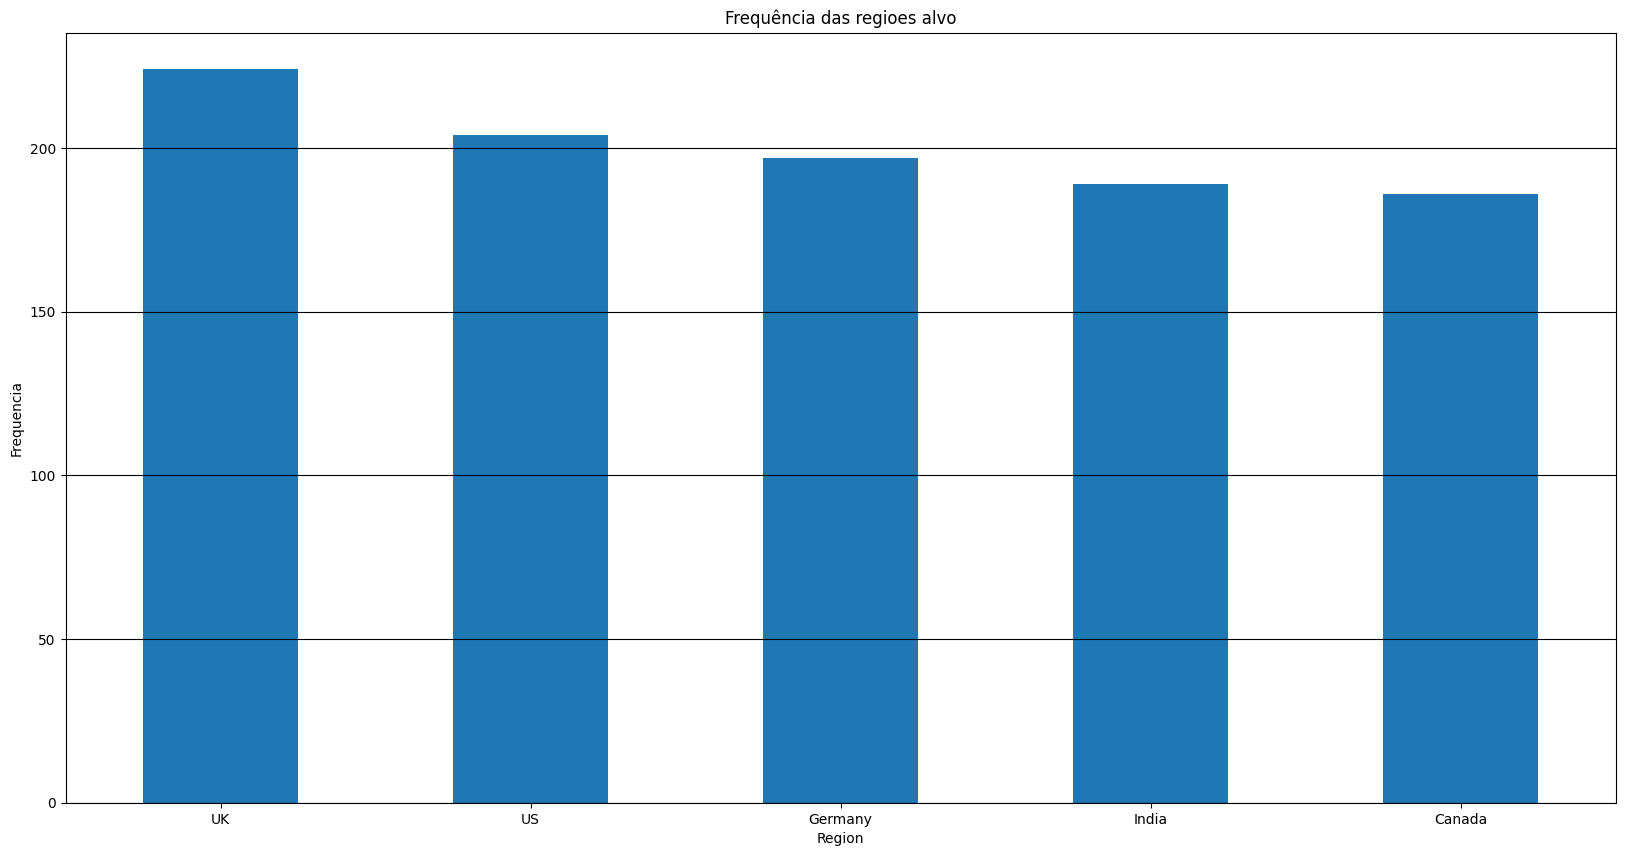

In [86]:
# Region

plt.figure(figsize=(20,10))
plt.title("Frequência das regioes alvo")
plt.xlabel("Region")
plt.ylabel("Frequencia")
df['Region'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [87]:
qtd_age = df['Region'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Region', 'Frequencia']
qtd_age

,Region,Frequencia
0,UK,224
1,US,204
2,Germany,197
3,India,189
4,Canada,186


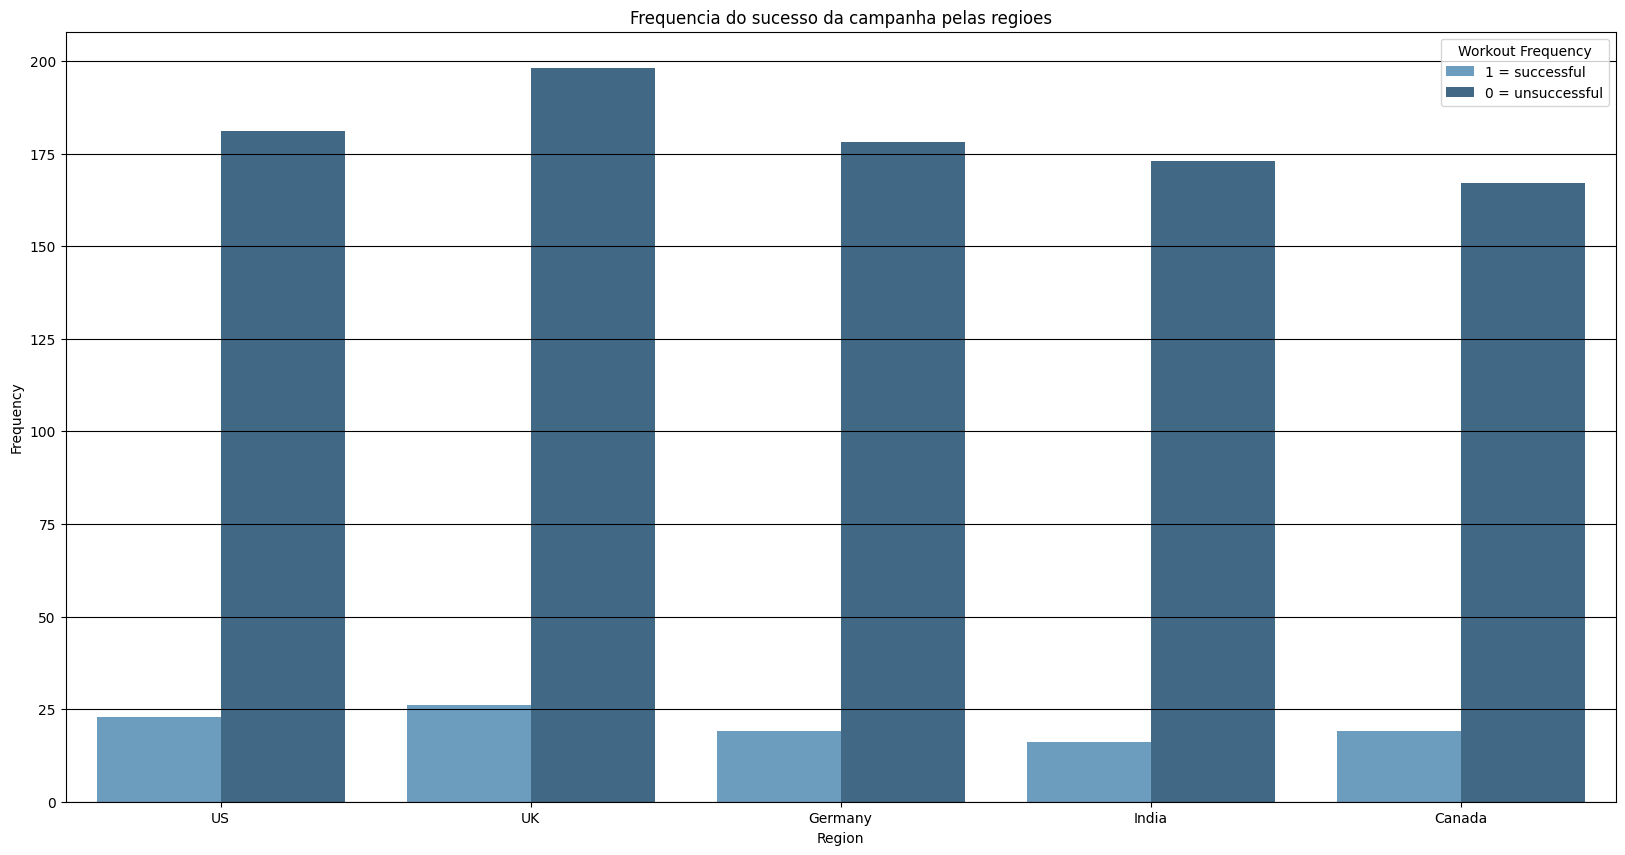

In [101]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Region', hue='Success', data=df, palette='Blues_d')
plt.title('Frequencia do sucesso da campanha pelas regioes')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = successful', '0 = unsuccessful']
plt.legend(handles, labels, title="Workout Frequency")
plt.show()

In [89]:
contagem = df.groupby(['Region', 'Success']).size().reset_index(name='Frequency')
contagem

,Region,Success,Frequency
0,Canada,0,19
1,Canada,1,167
2,Germany,0,19
3,Germany,1,178
4,India,0,16
5,India,1,173
6,UK,0,26
7,UK,1,198
8,US,0,23
9,US,1,181


In [90]:
#Frequencia da quantidade de cliques por propaganda
qtd_age = df['Clicks'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Clicks', 'Frequencia']
qtd_age

,Clicks,Frequencia
0,33787,2
1,33382,2
2,26233,2
3,3865,2
4,39018,2
...,...,...
984,13489,1
985,19172,1
986,24006,1
987,17314,1


In [91]:
# Frequencia do sucesso da camapanha pela quantidade de clicks
contagem = df.groupby(['Clicks', 'Success']).size().reset_index(name='Frequency')
contagem

,Clicks,Success,Frequency
0,98,0,1
1,116,0,1
2,279,0,1
3,400,0,1
4,452,1,1
...,...,...,...
987,49753,1,1
988,49774,1,1
989,49781,1,1
990,49806,1,1


In [92]:
# Frequencia da quantiade de conversoes feitas
qtd_age = df['Conversions'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Conversions', 'Frequencia']
qtd_age

,Conversions,Frequencia
0,1778,3
1,4921,3
2,2101,3
3,2687,3
4,2740,3
...,...,...
896,4793,1
897,2435,1
898,2869,1
899,2516,1


In [94]:
# Porcentagem das conversoes
qtd_age = df['Conversion_Rate'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Conversion_Rate', 'Frequencia']
qtd_age

,Conversion_Rate,Frequencia
0,4.381225,1
1,12.318012,1
2,18.469854,1
3,0.576752,1
4,5.068388,1
...,...,...
995,10.609222,1
996,6.502541,1
997,19.972277,1
998,3.696680,1


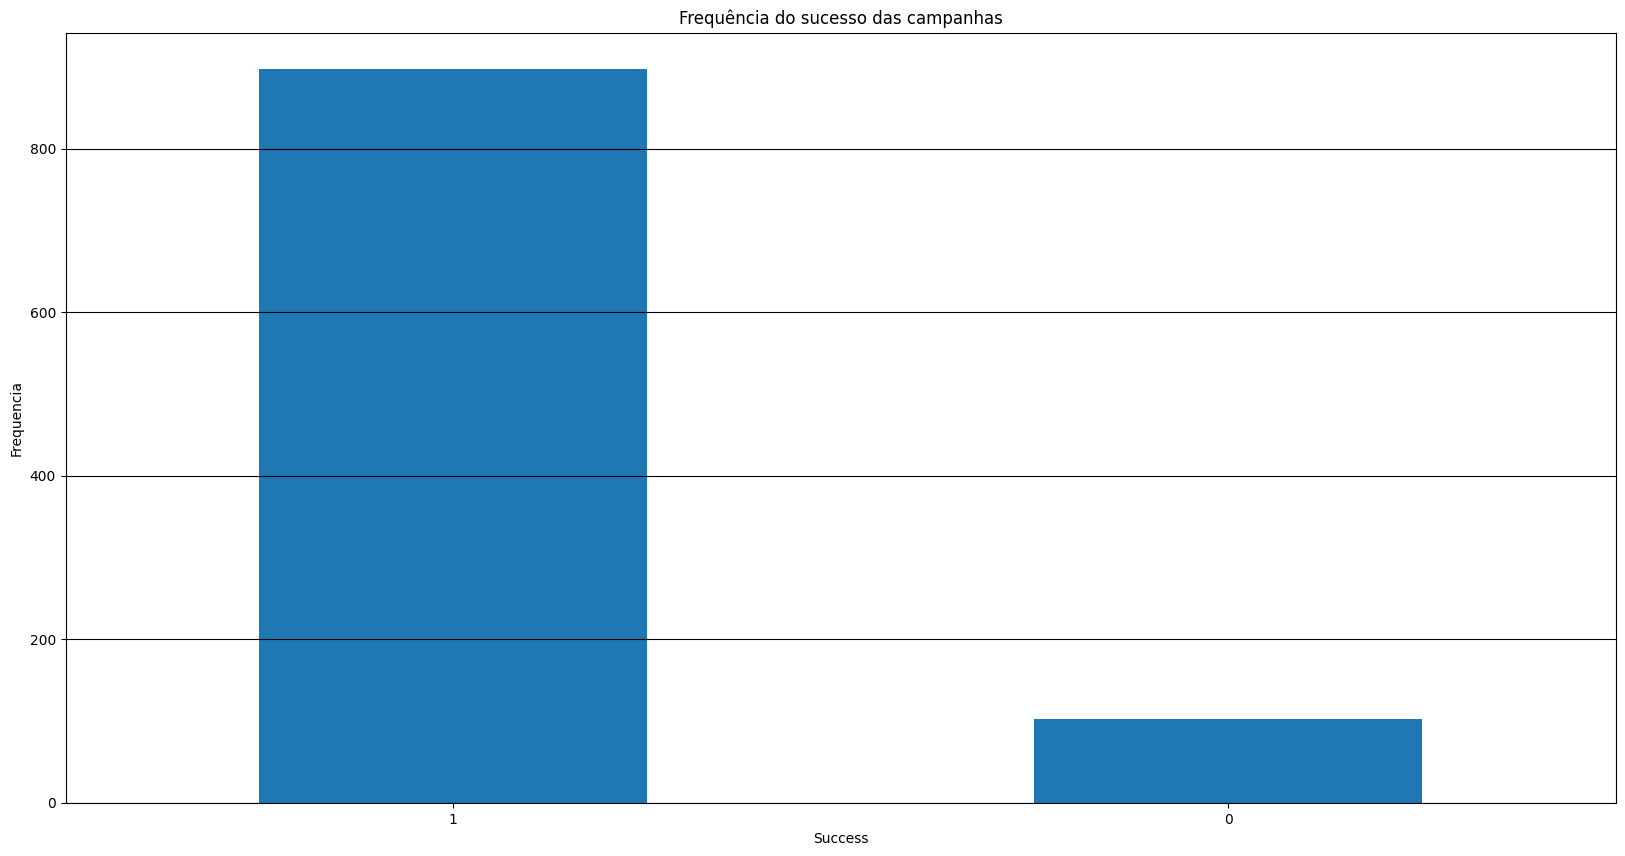

In [96]:
# Success

plt.figure(figsize=(20,10))
plt.title("Frequência do sucesso das campanhas")
plt.xlabel("Success")
plt.ylabel("Frequencia")
df['Success'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [97]:
qtd_age = df['Success'].value_counts().reset_index(name='Frequencia')
qtd_age.columns = ['Success', 'Frequencia']
qtd_age

,Success,Frequencia
0,1,897
1,0,103


# ML:

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [103]:
# Pré-processamento
le = LabelEncoder()

categorical_columns = ['Platform', 'Content_Type', 'Target_Age', 'Target_Gender', 'Region']

# Aplicando LabelEncoder para todas as colunas categóricas
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [104]:
# Definindo as variáveis X (features) e y (target)
X = df.drop(['Campaign_ID', 'Success'], axis=1)  # Remover colunas desnecessárias
y = df['Success']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Arvore de decisao

In [105]:
# Treinando o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prevendo e avaliando o modelo
y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.995
Acurácia média com validação cruzada: 0.99875


# Random Forest

In [106]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 1.0
Acurácia média com validação cruzada: 0.99875


# Normalizar dados

In [107]:
# Normalizando os dados com StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regressao Logistica

In [108]:
clf = LogisticRegression(random_state=42, max_iter = 3000, solver='liblinear', C=0.1, tol=1e-5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.9
Acurácia média com validação cruzada: 0.89625


# Redes Neurais

In [109]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.965
Acurácia média com validação cruzada: 0.89625


# K-Nearest Neighbors (KNN)

In [110]:
# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prevendo e avaliando o modelo
y_pred = knn.predict(X_test)

# Acurácia
print('Acurácia do KNN:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia do KNN: 0.895
Acurácia média com validação cruzada: 0.89625
